CARGA Y LIMPIEZA DE TRAIN.CSV

In [1]:
# Cargamos las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Cargamos el dataset train.csv

df = pd.read_csv("src\\datasets\\train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# Busca valores nulos
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
# Busca valores extraños
columns = df.columns
n_values = [df[a].unique() for a in df.columns]

count = pd.DataFrame()
count['features'] = columns
count['n_values'] = n_values
count

,features,n_values
0,PassengerId,"[0001_01, 0002_01, 0003_01, 0003_02, 0004_01, ..."
1,HomePlanet,"[Europa, Earth, Mars, nan]"
2,CryoSleep,"[False, True, nan]"
3,Cabin,"[B/0/P, F/0/S, A/0/S, F/1/S, F/0/P, F/2/S, G/0..."
4,Destination,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]"
5,Age,"[39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28...."
6,VIP,"[False, True, nan]"
7,RoomService,"[0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 71..."
8,FoodCourt,"[0.0, 9.0, 3576.0, 1283.0, 70.0, 483.0, 1539.0..."
9,ShoppingMall,"[0.0, 25.0, 371.0, 151.0, 3.0, 17.0, nan, 589...."


Rellenamos con 0 los valores nulos para las columnas de gastos y las las bool, entendiendo que la ausencia de dato quiere decir el no uso de este.

In [7]:
# Lista de columnas donde los nulos serán reemplazados con 0
columns_fill_zero = ['VIP', 'CryoSleep', 'RoomService' ,'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Rellenar esos valores nulos con 0
df[columns_fill_zero] = df[columns_fill_zero].fillna(0)

In [8]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

Convertimos los booleanos a int, porque facilita el trabajo para algunas algoritmos de ML

In [9]:
# Convertir 'VIP' y 'CryoSleep' a enteros (0 o 1)
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

In [10]:
# Divido en numéricas y categóricas, para imputar los valores nulos por separado
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Excluir las columnas que ya hemos rellenado con 0
numerical_cols = numerical_cols.difference(columns_fill_zero)

# Rellenar con la media en variables numéricas restantes
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Rellenar con la moda (el valor más frecuente) en variables categóricas
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
# Dividimos la columna Cabin en 3 columnas, ya que representa deck/num/side y será más fácil
# al entrenar el modelo y al hacer la conversion a numerico
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
try:
    df = df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

# Convertir 'Cabin_num' a numérico
df["Cabin_num"] = pd.to_numeric(df["Cabin_num"], errors='coerce')

In [12]:
# Convertir la variable objetivo 'Transported' a enteros
df['Transported'] = df['Transported'].astype(int)

In [13]:
# Borramos las columnas PassengerId y Name ya que no dan información relevante para el modelo
df = df.drop(['PassengerId', 'Name'], axis=1)

In [14]:
# Realizamos comprobacion para ver el Dataset
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [15]:
# Separar características (X) y etiquetas (y). (y) es la variable a predecir y (X) las predictoras
X = df.drop(columns=['Transported'])
y = df['Transported']

In [16]:
# Convertir variables categóricas a variables dummies (One-Hot Encoding)
X = pd.get_dummies(X)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Cabin_num                  8693 non-null   int64  
 9   HomePlanet_Earth           8693 non-null   bool   
 10  HomePlanet_Europa          8693 non-null   bool   
 11  HomePlanet_Mars            8693 non-null   bool   
 12  Destination_55 Cancri e    8693 non-null   bool   
 13  Destination_PSO J318.5-22  8693 non-null   bool 

In [18]:
# Convertir solo las columnas booleanas a 0 y 1
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype(int)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Cabin_num                  8693 non-null   int64  
 9   HomePlanet_Earth           8693 non-null   int64  
 10  HomePlanet_Europa          8693 non-null   int64  
 11  HomePlanet_Mars            8693 non-null   int64  
 12  Destination_55 Cancri e    8693 non-null   int64  
 13  Destination_PSO J318.5-22  8693 non-null   int64

In [20]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables numéricas
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [21]:
# Realizamos comprobacion para ver el Dataset
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


SEPARACIÓN DE DATOS Y ENTRENAMIENTO DEL MODELO

In [22]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# ** Modelo Random Forest con ajuste de hiperparámetros usando RandomizedSearchCV **

# Definir más hiperparámetros para Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500, 1000],           # Añadir más opciones de número de árboles
    'max_depth': [None, 10, 20, 30, 40, 50, 60],          # Añadir más valores de profundidad máxima
    'min_samples_split': [2, 5, 10, 15],                  # Más valores para el mínimo número de muestras para dividir
    'min_samples_leaf': [1, 2, 4, 6],                     # Añadir opciones para el tamaño mínimo de las hojas
    'max_features': ['sqrt', 'log2', 0.8, 0.6, 0.4],      # Probar diferentes proporciones de características
    'bootstrap': [True, False],                           # Usar muestreo con o sin reemplazo
    'criterion': ['gini', 'entropy'],                     # Probar distintos criterios para dividir
    'class_weight': [None, 'balanced', 'balanced_subsample'] # Ajuste de pesos para clases desbalanceadas
}

# Crear el modelo base
model_rf = RandomForestClassifier(random_state=42)

# Implementar RandomizedSearchCV para ajustar los hiperparámetros
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist_rf, 
                                      n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1)

# Entrenar el modelo con los mejores hiperparámetros encontrados
random_search_rf.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Best hyperparameters for Random Forest: {random_search_rf.best_params_}")

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_model_rf = random_search_rf.best_estimator_.predict(X_test)

# Evaluar el modelo
accuracy_model_rf = accuracy_score(y_test, y_pred_model_rf)
print(f"Random Forest Accuracy (after hyperparameter tuning): {accuracy_model_rf:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Administrator\Desktop\IA_Bootcamp\Proyecto_Spaceship_Titanic\AndreaMB_Spaceship_Titanic\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}
Random Forest Accuracy (after hyperparameter tuning): 0.8014


In [24]:
# Validación cruzada con 5 particiones (folds) usando el mejor modelo
cv_scores_rf = cross_val_score(random_search_rf.best_estimator_, X, y, cv=5)

# Imprimir los resultados promedio
print(f"Cross-validation scores (Random Forest): {cv_scores_rf}")
print(f"Mean cross-validation accuracy (Random Forest): {cv_scores_rf.mean():.4f}")

Cross-validation scores (Random Forest): [0.77285796 0.77343301 0.80276021 0.83026467 0.79631761]
Mean cross-validation accuracy (Random Forest): 0.7951


Feature ranking (all features):
1. Feature CryoSleep (0.1480)
2. Feature Spa (0.1337)
3. Feature RoomService (0.1259)
4. Feature VRDeck (0.1063)
5. Feature FoodCourt (0.0961)
6. Feature Cabin_num (0.0796)
7. Feature ShoppingMall (0.0713)
8. Feature Age (0.0667)
9. Feature HomePlanet_Earth (0.0329)
10. Feature HomePlanet_Europa (0.0256)
11. Feature Deck_G (0.0172)
12. Feature Deck_F (0.0152)
13. Feature Deck_E (0.0144)
14. Feature Side_P (0.0122)
15. Feature Side_S (0.0120)
16. Feature HomePlanet_Mars (0.0115)
17. Feature Destination_TRAPPIST-1e (0.0080)
18. Feature Deck_B (0.0062)
19. Feature Destination_55 Cancri e (0.0058)
20. Feature Deck_C (0.0052)
21. Feature Destination_PSO J318.5-22 (0.0028)
22. Feature Deck_D (0.0018)
23. Feature Deck_A (0.0009)
24. Feature VIP (0.0005)
25. Feature Deck_T (0.0000)


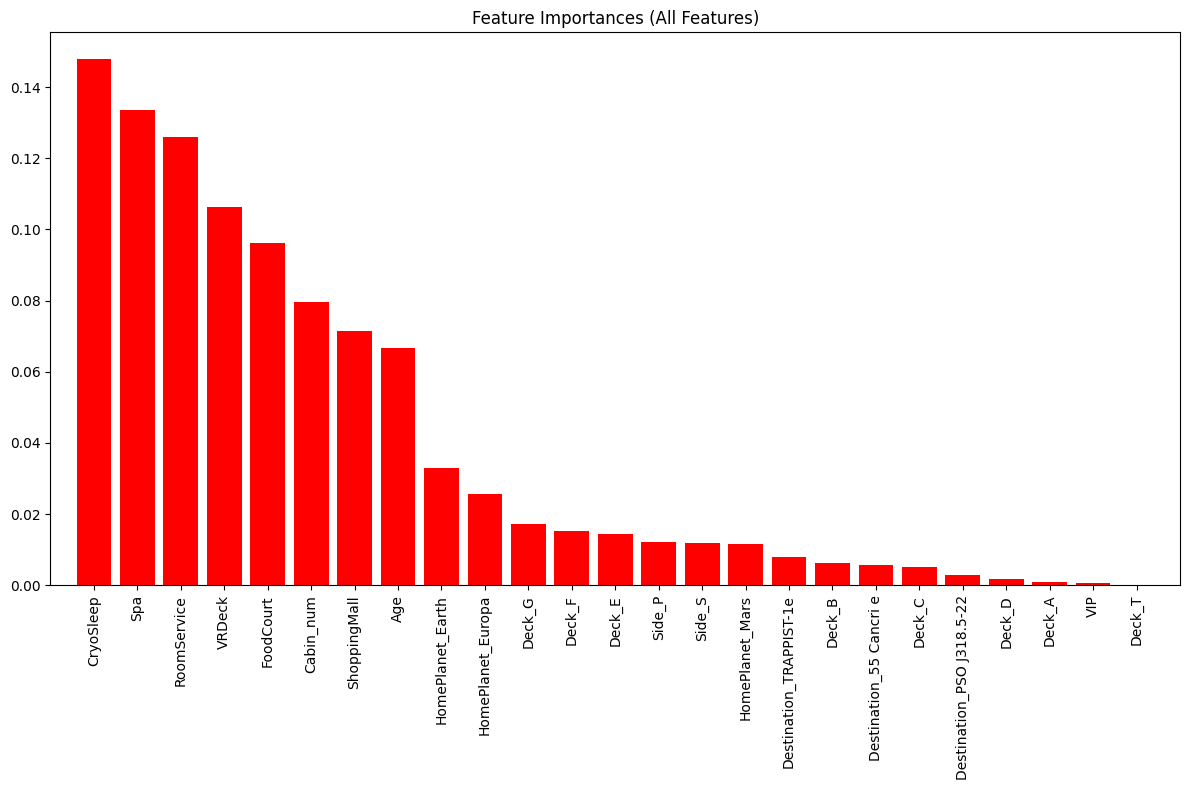

In [25]:
# ** IMPORTANCIA DE LAS CARACTERÍSTICAS **

# Entrenar Random Forest con el mejor modelo para obtener la importancia de las características
best_rf_model = random_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = best_rf_model.feature_importances_

# Ordenar características por importancia
indices = np.argsort(importances)[::-1]

# Mostrar la importancia de todas las características
print("Feature ranking (all features):")
for i in range(len(X.columns)):
    print(f"{i + 1}. Feature {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

# Visualizar la importancia de todas las características
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (All Features)")
plt.bar(range(len(X.columns)), importances[indices], color="r", align="center")
plt.xticks(range(len(X.columns)), X.columns[indices], rotation=90)
plt.xlim([-1, len(X.columns)])
plt.tight_layout()  # Ajustar la gráfica para que no se corten las etiquetas
plt.show()

In [49]:
# Eliminar la columna 'VIP' del conjunto de datos
X_train = X_train.drop(columns=['VIP'])
X_test = X_test.drop(columns=['VIP'])

In [50]:
# Volver a entrenar el modelo con las características restantes
best_rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba con el modelo ajustado
y_pred_model_rf = best_rf_model.predict(X_test)

# Evaluar el modelo
accuracy_model_rf = accuracy_score(y_test, y_pred_model_rf)
print(f"Random Forest Accuracy (after removing VIP): {accuracy_model_rf:.4f}")

Random Forest Accuracy (after removing VIP): 0.7991


LIMPIEZA DE TEST.CSV

In [28]:
# Carga del dataset de Test
test_df = pd.read_csv(".\\src\\datasets\\test.csv")

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [30]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [31]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [32]:
# Busca valores extraños
columns = test_df.columns
n_values = [test_df[a].unique() for a in test_df.columns]

count = pd.DataFrame()
count['features'] = columns
count['n_values'] = n_values
count

,features,n_values
0,PassengerId,"[0013_01, 0018_01, 0019_01, 0021_01, 0023_01, ..."
1,HomePlanet,"[Earth, Europa, Mars, nan]"
2,CryoSleep,"[True, False, nan]"
3,Cabin,"[G/3/S, F/4/S, C/0/S, C/1/S, F/5/S, F/7/P, B/2..."
4,Destination,"[TRAPPIST-1e, 55 Cancri e, PSO J318.5-22, nan]"
5,Age,"[27.0, 19.0, 31.0, 38.0, 20.0, 21.0, 23.0, 24...."
6,VIP,"[False, nan, True]"
7,RoomService,"[0.0, 10.0, 339.0, 932.0, 2.0, 26.0, nan, 39.0..."
8,FoodCourt,"[0.0, 9.0, 6652.0, 1615.0, nan, 639.0, 3.0, 74..."
9,ShoppingMall,"[0.0, 635.0, 263.0, 136.0, nan, 253.0, 243.0, ..."


In [33]:
# Lista de columnas donde los nulos serán reemplazados con 0
test_columns_fill_zero = ['VIP', 'CryoSleep', 'RoomService' ,'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Rellenar esos valores nulos con 0
test_df[test_columns_fill_zero] = test_df[test_columns_fill_zero].fillna(0)


# Convertir 'VIP' y 'CryoSleep' a enteros (0 o 1)
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

In [34]:
# Dividimos la columna Cabin en 3 columnas, ya que representa deck/num/side y será más fácil
# al entrenar el modelo y al hacer la conversion a numerico
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
try:
    test_df = test_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

# Convertir 'Cabin_num' a numérico
test_df["Cabin_num"] = pd.to_numeric(test_df["Cabin_num"], errors='coerce')

In [35]:
# Divido en numéricas y categóricas, para imputar los valores nulos por separado
test_categorical_cols = test_df.select_dtypes(include=['object']).columns
test_numerical_cols = test_df.select_dtypes(include=['float64', 'int64']).columns

# Excluir las columnas que ya hemos rellenado con 0
test_numerical_cols = test_numerical_cols.difference(test_columns_fill_zero)

# Rellenar con la media en variables numéricas restantes
for col in test_numerical_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mean())

# Rellenar con la moda (el valor más frecuente) en variables categóricas
for col in test_categorical_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [36]:
# Borramos las columnas PassengerId y Name ya que no dan información relevante para el modelo
test_df = test_df.drop(['PassengerId', 'Name'], axis=1)

In [37]:
test_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Cabin_num       0
Side            0
dtype: int64

In [38]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
0,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,G,3.0,S
1,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,4.0,S
2,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,C,0.0,S
3,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,C,1.0,S
4,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,F,5.0,S


In [39]:
# Convertir variables categóricas a variables dummies (One-Hot Encoding)
test_df = pd.get_dummies(test_df)
# Convertir solo las columnas booleanas a 0 y 1
for col in test_df.select_dtypes(include=['bool']).columns:
    test_df[col] = test_df[col].astype(int)

In [40]:
# Escalar las variables numéricas
test_numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
test_df[numeric_cols] = scaler.transform(test_df[test_numeric_cols])

In [41]:
# Busca valores extraños
columns = test_df.columns
n_values = [test_df[a].unique() for a in test_df.columns]

count = pd.DataFrame()
count['features'] = columns
count['n_values'] = n_values
count

,features,n_values
0,CryoSleep,"[1, 0]"
1,Age,"[-0.12748648295337112, -0.6854354212634657, 0...."
2,VIP,"[0, 1]"
3,RoomService,"[-0.33310465947702855, -0.3179641798489641, 0...."
4,FoodCourt,"[-0.2810267305009518, -0.27538656847021764, 3...."
5,ShoppingMall,"[-0.2835786325139853, 0.7783426371910176, 0.15..."
6,Spa,"[-0.2706259042558427, 2.2375975290211505, -0.1..."
7,VRDeck,"[-0.26300328786535954, 0.2528418963288631, -0...."
8,Cabin_num,"[-1.185819071683609, -1.1838441113539715, -1.1..."
9,HomePlanet_Earth,"[1, 0]"


In [42]:
# Eliminar la columna 'VIP' si fue eliminada en el modelo de entrenamiento
test_df = test_df.drop(columns=['VIP'], errors='ignore')

In [43]:
test_df.describe()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,...,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,0.361001,-0.011841,-0.007490,-0.012435,0.006122,-0.007724,0.005852,0.013335,0.549451,0.234276,...,0.022913,0.084639,0.083002,0.056582,0.104513,0.361235,0.285714,0.001403,0.487257,0.512743
std,0.480347,0.978320,0.911327,0.946392,0.928122,0.981674,1.089881,1.005079,0.497607,0.423595,...,0.149644,0.278376,0.275918,0.231069,0.305960,0.480415,0.451807,0.037433,0.499896,0.499896
min,0.000000,-2.010564,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.191744,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.615692,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-0.838226,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-0.127486,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-0.277337,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.569950,-0.260430,-0.239666,-0.238426,-0.232421,-0.235668,0.806916,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,3.499182,17.179888,15.557175,13.583274,17.360683,19.376149,2.540931,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   RoomService                4277 non-null   float64
 3   FoodCourt                  4277 non-null   float64
 4   ShoppingMall               4277 non-null   float64
 5   Spa                        4277 non-null   float64
 6   VRDeck                     4277 non-null   float64
 7   Cabin_num                  4277 non-null   float64
 8   HomePlanet_Earth           4277 non-null   int64  
 9   HomePlanet_Europa          4277 non-null   int64  
 10  HomePlanet_Mars            4277 non-null   int64  
 11  Destination_55 Cancri e    4277 non-null   int64  
 12  Destination_PSO J318.5-22  4277 non-null   int64  
 13  Destination_TRAPPIST-1e    4277 non-null   int64

In [47]:
test_df.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1,-0.127486,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.185819,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,-0.685435,-0.333105,-0.275387,-0.283579,2.237598,-0.263003,-1.183844,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0.151488,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.191744,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0.639693,-0.333105,3.887680,-0.283579,-0.109808,0.252842,-1.189769,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,-0.615692,-0.317964,-0.281027,0.778343,-0.270626,-0.263003,-1.181869,1,0,...,0,0,0,0,0,1,0,0,0,1


REALIZAMOS PREDICCIONES CON TEST.CSV Y LOS GUARDAMOS COMO SUBMISSION

In [52]:
# Alinear las columnas de test_df con las de X_train
# Si faltan columnas en test_df, las agregamos y las rellenamos con 0
for col in X_train.columns:
    if col not in test_df.columns:
        test_df[col] = 0

# Si test_df tiene columnas adicionales que no están en X_train, las eliminamos
test_df = test_df[X_train.columns]

In [53]:
# Realizar las predicciones con el modelo entrenado
test_predictions = best_rf_model.predict(test_df)

In [54]:
# Convertir las predicciones de 0/1 a True/False
test_predictions_bool = test_predictions.astype(bool)

In [55]:
# Cargar nuevamente PassengerId desde el archivo original de test.csv
original_test_df = pd.read_csv(".\\src\\datasets\\test.csv")

# Crear el dataframe con PassengerId y las predicciones (Transported)
submission_df = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Transported': test_predictions_bool
})

In [57]:
# Guardar el dataframe de submission en un archivo CSV
submission_df.to_csv('.\\src\\datasets\\submission.csv', index=False)

In [61]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB
